## Vexere Dataset Analysis 

#### Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib


%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

#### Read in data

In [2]:
df = pd.read_excel(r"C:\Users\Dell\Downloads\VeXeRe - Junior Data Analyst - Dataset.xlsx")
df.head()

,booking_code,customer_id,ticket_source_name,created_date,trip_date,from_to,comp_id,bus_rating,vehicle_type,seat_type,quantity,total_fare,customer_type
0,ZZ79Y,//XTrwPRPs2v7NlVb4sQ,Android,2020-07-11,2020-07-12,Hồ Chí Minh - Vĩnh Long,SEdmxcaTjEz8RRJpPM13Dwn+U/G9IxtHIfDULi6fxBI,4.1,normal,Sleeper,1,96000,New Customer
1,9I4Y4,/+K/lksxmcWdGKLQ26dA,iOS,2020-07-16,2020-07-16,Hồ Chí Minh - Bình Thuận,0CjrvlFTB0WtkbXzbICEsrAqoexAcrY5otb44hQzxGg,4.8,normal,Sleeper,1,168000,Old Customer
2,FP285,/0i6xIqlQskQASEuAuCA,Android,2020-07-25,2020-07-28,Nghệ An - Hà Nội,G29Krp2D4RNoD3mBRPI76T1M+EN4CaHcAVNRxWXFSfA,4.4,limousine,Sleeper,1,240000,New Customer
3,9R3T7,/0M08y4bMNKAX1y20JTg,iOS,2020-07-04,2020-07-05,Lâm Đồng - Hồ Chí Minh,jNPO7+b/j9cYdfMaiHsSIeBAQVmZnNw1i865WHHVkZI,4.0,normal,Sleeper,2,400000,Old Customer
4,0F013,/14OguZKy9lO6psNpiAw,Android,2020-07-01,2020-07-02,Hồ Chí Minh - Ninh Thuận,ZX/uWhvaphDQluCb+boYgAgnU3wOaCIinCarURzrCXc,4.6,limousine,Sleeper,2,720000,New Customer


### Clean up the data

#### Check data type

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6754 entries, 0 to 6753
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   booking_code        6754 non-null   object        
 1   customer_id         6754 non-null   object        
 2   ticket_source_name  6754 non-null   object        
 3   created_date        6754 non-null   datetime64[ns]
 4   trip_date           6754 non-null   datetime64[ns]
 5   from_to             6754 non-null   object        
 6   comp_id             6754 non-null   object        
 7   bus_rating          6710 non-null   float64       
 8   vehicle_type        6674 non-null   object        
 9   seat_type           6674 non-null   object        
 10  quantity            6754 non-null   int64         
 11  total_fare          6754 non-null   int64         
 12  customer_type       6726 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(2), obje

#### Find missing data

In [31]:
for col in df.columns:
    pct = np.mean(df[col].isnull())
    print(f"{col} - {pct}%")

booking_code - 0.0%
customer_id - 0.0%
ticket_source_name - 0.0%
created_date - 0.0%
trip_date - 0.0%
from_to - 0.0%
comp_id - 0.0%
bus_rating - 0.006514657980456026%
vehicle_type - 0.011844832691738229%
seat_type - 0.011844832691738229%
quantity - 0.0%
total_fare - 0.0%
customer_type - 0.00414569144210838%


#### >> bus_rating, vehicle_type, seat_type, customer_type are missing data

#### Fill in the data and solving missing value
#### + First for bus_rating >> use the mean to replace with missing data

In [3]:
df["bus_rating"] = df["bus_rating"].fillna(value=df["bus_rating"].mean())

#### + Then for vehicle_type and seat_type fill in unknown to missing value

In [4]:
df["vehicle_type"] = df["vehicle_type"].fillna(value="unknown")
df["seat_type"] = df["seat_type"].fillna(value="unknown")

#### + customer_type: Create new column for customer_type ( get min purchase from created_date to find first purchase day and then compare to created_date to find the new_customer_type ) 

In [5]:
min_purchase = df.groupby("customer_id")["created_date"].min().reset_index()
min_purchase.columns = ["customer_id","min_purchase"]

In [36]:
min_purchase

,customer_id,min_purchase
0,++B9tckBgQze6DGeAsyA,2020-07-27
1,++iQxyPsM6AQjmPjjKcQ,2020-07-17
2,++n+CKgSeKkVqCGcCk1w,2020-08-21
3,+/ROWqSLCOkz3rRv4+aQ,2020-07-20
4,+2HSp4iZB1VdWd2taKkA,2020-07-01
...,...,...
4131,zdcKlozTNGnWaPRtoMCw,2020-07-08
4132,zeCPI4U2t6sdw2pUvr+A,2020-07-03
4133,zeZj3gKPN8UcPZi5GHCw,2020-07-16
4134,zes+yIVYV2M5wDeiuLbA,2020-07-14


In [6]:
df = pd.merge(df,min_purchase,on="customer_id")

In [39]:
df.head(20)

,booking_code,customer_id,ticket_source_name,created_date,trip_date,from_to,comp_id,bus_rating,vehicle_type,seat_type,quantity,total_fare,customer_type,min_purchase
0,ZZ79Y,//XTrwPRPs2v7NlVb4sQ,Android,2020-07-11,2020-07-12,Hồ Chí Minh - Vĩnh Long,SEdmxcaTjEz8RRJpPM13Dwn+U/G9IxtHIfDULi6fxBI,4.1,normal,Sleeper,1,96000,New Customer,2020-07-11
1,9I4Y4,/+K/lksxmcWdGKLQ26dA,iOS,2020-07-16,2020-07-16,Hồ Chí Minh - Bình Thuận,0CjrvlFTB0WtkbXzbICEsrAqoexAcrY5otb44hQzxGg,4.8,normal,Sleeper,1,168000,Old Customer,2020-07-16
2,FP285,/0i6xIqlQskQASEuAuCA,Android,2020-07-25,2020-07-28,Nghệ An - Hà Nội,G29Krp2D4RNoD3mBRPI76T1M+EN4CaHcAVNRxWXFSfA,4.4,limousine,Sleeper,1,240000,New Customer,2020-07-25
3,9R3T7,/0M08y4bMNKAX1y20JTg,iOS,2020-07-04,2020-07-05,Lâm Đồng - Hồ Chí Minh,jNPO7+b/j9cYdfMaiHsSIeBAQVmZnNw1i865WHHVkZI,4.0,normal,Sleeper,2,400000,Old Customer,2020-07-04
4,0F013,/14OguZKy9lO6psNpiAw,Android,2020-07-01,2020-07-02,Hồ Chí Minh - Ninh Thuận,ZX/uWhvaphDQluCb+boYgAgnU3wOaCIinCarURzrCXc,4.6,limousine,Sleeper,2,720000,New Customer,2020-07-01
5,74AIU,/14OguZKy9lO6psNpiAw,Android,2020-08-19,2020-08-20,Hồ Chí Minh - Ninh Thuận,ZX/uWhvaphDQluCb+boYgAgnU3wOaCIinCarURzrCXc,4.6,limousine,Sleeper,2,840000,Old Customer,2020-07-01
6,72UP7,/183ykwv73FlYguZ7M9Q,iOS,2020-07-28,2020-07-28,Kiên Giang - Hồ Chí Minh,OJR6c4Dznvo3s55VV29CkKBAXxDyv3ZGzkkZU+2AQHM,4.9,limousine,Sleeper,1,224000,New Customer,2020-07-28
7,9KLU0,/1LeBHstpoAgVzsr0/oA,iOS,2020-07-15,2020-07-19,Hồ Chí Minh - Kiên Giang,OJR6c4Dznvo3s55VV29CkKBAXxDyv3ZGzkkZU+2AQHM,4.9,limousine,Sleeper,3,1008000,New Customer,2020-07-15
8,684OM,/21JDU5c20F/4JyGb2Cg,Android,2020-07-05,2020-07-06,Quảng Ninh - Hà Nội,VVg96MEsk5RjGkMQ8a2fAaNoScVV+iSAj5irdP5GKaE,4.0,limousine,Seater,1,300000,New Customer,2020-07-05
9,E6YER,/2gEyq2je1sflJ3Gh0MQ,Android,2020-07-12,2020-07-31,Hồ Chí Minh - Khánh Hòa,P57UqyeJhRKYqWo206C6ygntgl5aZGmHzcRiRYUjEYs,4.4,normal,Sleeper,4,640000,New Customer,2020-07-12


In [7]:
df["new_customer_type"] = "New Customer"

In [41]:
df

,booking_code,customer_id,ticket_source_name,created_date,trip_date,from_to,comp_id,bus_rating,vehicle_type,seat_type,quantity,total_fare,customer_type,min_purchase,new_customer_type
0,ZZ79Y,//XTrwPRPs2v7NlVb4sQ,Android,2020-07-11,2020-07-12,Hồ Chí Minh - Vĩnh Long,SEdmxcaTjEz8RRJpPM13Dwn+U/G9IxtHIfDULi6fxBI,4.1,normal,Sleeper,1,96000,New Customer,2020-07-11,New Customer
1,9I4Y4,/+K/lksxmcWdGKLQ26dA,iOS,2020-07-16,2020-07-16,Hồ Chí Minh - Bình Thuận,0CjrvlFTB0WtkbXzbICEsrAqoexAcrY5otb44hQzxGg,4.8,normal,Sleeper,1,168000,Old Customer,2020-07-16,New Customer
2,FP285,/0i6xIqlQskQASEuAuCA,Android,2020-07-25,2020-07-28,Nghệ An - Hà Nội,G29Krp2D4RNoD3mBRPI76T1M+EN4CaHcAVNRxWXFSfA,4.4,limousine,Sleeper,1,240000,New Customer,2020-07-25,New Customer
3,9R3T7,/0M08y4bMNKAX1y20JTg,iOS,2020-07-04,2020-07-05,Lâm Đồng - Hồ Chí Minh,jNPO7+b/j9cYdfMaiHsSIeBAQVmZnNw1i865WHHVkZI,4.0,normal,Sleeper,2,400000,Old Customer,2020-07-04,New Customer
4,0F013,/14OguZKy9lO6psNpiAw,Android,2020-07-01,2020-07-02,Hồ Chí Minh - Ninh Thuận,ZX/uWhvaphDQluCb+boYgAgnU3wOaCIinCarURzrCXc,4.6,limousine,Sleeper,2,720000,New Customer,2020-07-01,New Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6749,OR914,ZGDaQB+WbC6wYGN0tLUg,Android,2020-07-25,2020-07-26,Hồ Chí Minh - Đắk Nông,4OH9jsKN3R4Can+WNbwHdcSa43iJ7OH04W4PdBG0MGo,3.2,normal,Sleeper,1,264000,New Customer,2020-07-25,New Customer
6750,TK5YE,ZGDaQB+WbC6wYGN0tLUg,Android,2020-07-25,2020-07-26,Đắk Nông - Hồ Chí Minh,VQskpo8A72uzGQSXOP04omN3AHsYV5orHuSrObloJV8,4.5,limousine,Sleeper,1,304000,New Customer,2020-07-25,New Customer
6751,0A9R6,zgnerBTLQyImH9J3q+Xw,Android,2020-08-24,2020-08-25,Trà Vinh - Hồ Chí Minh,LxRzKihOv0IAcAH+cvrU02yS3QRwjWYFPx9gLPmh+/c,3.4,normal,Sleeper,1,104000,New Customer,2020-08-24,New Customer
6752,46C9F,zHP+Dmdn9MYSubw9/cjA,iOS,2020-07-13,2020-07-19,Đà Nẵng - Đắk Lắk,4EzjzNDJAz3PCbGTMb5/K9MDUJyf4+v/w5GD2N2r6QU,4.0,limousine,Sleeper,2,720000,Old Customer,2020-07-13,New Customer


In [8]:
df.loc[df["created_date"] > df["min_purchase"],"new_customer_type"] = "Old Customer"

In [46]:
df.head()

,booking_code,customer_id,ticket_source_name,created_date,trip_date,from_to,comp_id,bus_rating,vehicle_type,seat_type,quantity,total_fare,customer_type,min_purchase,new_customer_type
0,ZZ79Y,//XTrwPRPs2v7NlVb4sQ,Android,2020-07-11,2020-07-12,Hồ Chí Minh - Vĩnh Long,SEdmxcaTjEz8RRJpPM13Dwn+U/G9IxtHIfDULi6fxBI,4.1,normal,Sleeper,1,96000,New Customer,2020-07-11,New Customer
1,9I4Y4,/+K/lksxmcWdGKLQ26dA,iOS,2020-07-16,2020-07-16,Hồ Chí Minh - Bình Thuận,0CjrvlFTB0WtkbXzbICEsrAqoexAcrY5otb44hQzxGg,4.8,normal,Sleeper,1,168000,Old Customer,2020-07-16,New Customer
2,FP285,/0i6xIqlQskQASEuAuCA,Android,2020-07-25,2020-07-28,Nghệ An - Hà Nội,G29Krp2D4RNoD3mBRPI76T1M+EN4CaHcAVNRxWXFSfA,4.4,limousine,Sleeper,1,240000,New Customer,2020-07-25,New Customer
3,9R3T7,/0M08y4bMNKAX1y20JTg,iOS,2020-07-04,2020-07-05,Lâm Đồng - Hồ Chí Minh,jNPO7+b/j9cYdfMaiHsSIeBAQVmZnNw1i865WHHVkZI,4.0,normal,Sleeper,2,400000,Old Customer,2020-07-04,New Customer
4,0F013,/14OguZKy9lO6psNpiAw,Android,2020-07-01,2020-07-02,Hồ Chí Minh - Ninh Thuận,ZX/uWhvaphDQluCb+boYgAgnU3wOaCIinCarURzrCXc,4.6,limousine,Sleeper,2,720000,New Customer,2020-07-01,New Customer


#### I defined the first date that customer ordered will be considered them as new customer and the subsequent orders will be counted as old customer

#### - Created_date: the date that customer ordered ticket 
#### - Trip_date: departure day

### Argument data with additional columns

#### Add Month, day_pre_book column

In [9]:

df["Month"] = df["trip_date"].apply(lambda x:x.month)
df["day_pre_book"] = df["trip_date"] - df["created_date"]

In [57]:
df.head()

,booking_code,customer_id,ticket_source_name,created_date,trip_date,from_to,comp_id,bus_rating,vehicle_type,seat_type,quantity,total_fare,customer_type,min_purchase,new_customer_type,Month,day_pre_book
0,ZZ79Y,//XTrwPRPs2v7NlVb4sQ,Android,2020-07-11,2020-07-12,Hồ Chí Minh - Vĩnh Long,SEdmxcaTjEz8RRJpPM13Dwn+U/G9IxtHIfDULi6fxBI,4.1,normal,Sleeper,1,96000,New Customer,2020-07-11,New Customer,7,1 days
1,9I4Y4,/+K/lksxmcWdGKLQ26dA,iOS,2020-07-16,2020-07-16,Hồ Chí Minh - Bình Thuận,0CjrvlFTB0WtkbXzbICEsrAqoexAcrY5otb44hQzxGg,4.8,normal,Sleeper,1,168000,Old Customer,2020-07-16,New Customer,7,0 days
2,FP285,/0i6xIqlQskQASEuAuCA,Android,2020-07-25,2020-07-28,Nghệ An - Hà Nội,G29Krp2D4RNoD3mBRPI76T1M+EN4CaHcAVNRxWXFSfA,4.4,limousine,Sleeper,1,240000,New Customer,2020-07-25,New Customer,7,3 days
3,9R3T7,/0M08y4bMNKAX1y20JTg,iOS,2020-07-04,2020-07-05,Lâm Đồng - Hồ Chí Minh,jNPO7+b/j9cYdfMaiHsSIeBAQVmZnNw1i865WHHVkZI,4.0,normal,Sleeper,2,400000,Old Customer,2020-07-04,New Customer,7,1 days
4,0F013,/14OguZKy9lO6psNpiAw,Android,2020-07-01,2020-07-02,Hồ Chí Minh - Ninh Thuận,ZX/uWhvaphDQluCb+boYgAgnU3wOaCIinCarURzrCXc,4.6,limousine,Sleeper,2,720000,New Customer,2020-07-01,New Customer,7,1 days


## Data Exploration

In [60]:
data = df.groupby("from_to").count()["customer_id"].sort_values(ascending=False)
data

from_to
Hồ Chí Minh - Khánh Hòa          639
Khánh Hòa - Hồ Chí Minh          504
Bà Rịa-Vũng Tàu - Hồ Chí Minh    296
Hồ Chí Minh - Bà Rịa-Vũng Tàu    293
Hải Phòng - Hà Nội               276
                                ... 
Kon Tum - Đắk Lắk                  1
Long An - Khánh Hòa                1
Quảng Nam - Quảng Trị              1
Quảng Nam - Quảng Ngãi             1
An Giang - Bình Phước              1
Name: customer_id, Length: 301, dtype: int64

#### >> Route sold the most ticket: Ho Chi Minh - Khanh Hoa and Khanh Hoa - Ho Chi Minh

In [63]:
from_to_list = [route for route,df in data.items()]
from_to_lists = from_to_list[0:11]
data_ticket = [df for route,df in data.items()]
data_ticket = data_ticket[0:11]

#### Top 11 route sold most ticket 

Text(0.5, 1.0, 'Total Ticket Per Route')

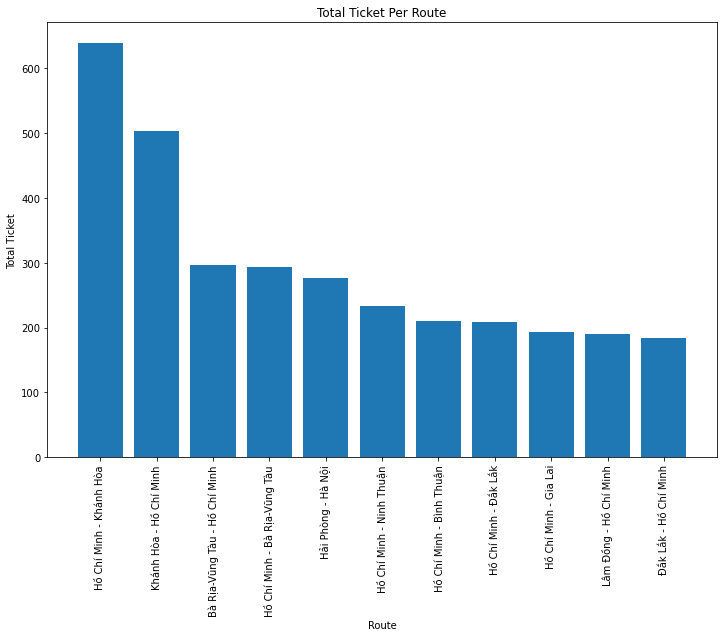

In [92]:
plt.bar(from_to_lists,data_ticket)
plt.xticks(rotation="vertical")
plt.xlabel("Route")
plt.ylabel("Total Ticket")
plt.title("Total Ticket Per Route")

#### >> this given data depicts ticket often sold for Southern route more

In [70]:
df.groupby("comp_id").count()["customer_id"].sort_values(ascending=False)

comp_id
HzeMkrKlOA3bIoNa4t7zcouqsc9WDAziKuANbin0Joc    387
ZX/uWhvaphDQluCb+boYgAgnU3wOaCIinCarURzrCXc    359
ZNDdklXZ9heMhXqaslijfMjcAbbS/VEli9GIYriP7CQ    280
VQskpo8A72uzGQSXOP04omN3AHsYV5orHuSrObloJV8    224
lzhqg6Sxvu3u54zGoKnzdQ50NGJGZ8vPhJd/pXcUn0c    186
                                              ... 
gRx6idu3AZI7kvEciXGmRACB4ihMjsSrFVjSb82USV0      1
pmNM3nNIMpN1CsoNLefCpdgVbre+3MQ4FpaEnaT8bY4      1
IFpmU6TiR/cwD9aLfjUHo8jxLBw0xfgOuGbrBpgoGI0      1
qDzsfeSMf1QvceWC2RlbNciDzH2+YBO2pVbEkBCLfXg      1
zrC944YYbZwymAvq//Mo8/Dp9Al0/jr1aWE7fqJulm0      1
Name: customer_id, Length: 290, dtype: int64

#### >> This comp_id sold most ticket: HzeMkrKlOA3bIoNa4t7zcouqsc9WDAziKuANbin0Joc, with 387 tickets

In [73]:
df.groupby("ticket_source_name").count()["customer_id"]

ticket_source_name
 Android    2703
 iOS        4051
Name: customer_id, dtype: int64

#### >> Most tickets bought were used by IOS, higher than approximately 40% than Android 
#### >> Action: encourage Android user more by sending them coupon or remind them to get back to our app

In [74]:
data_f = df.groupby(["vehicle_type","seat_type"]).count()["customer_id"]
data_f.head()

vehicle_type  seat_type
limousine     Seater       1847
              Sleeper      1608
normal        Seater        349
              Sleeper      2870
unknown       unknown        80
Name: customer_id, dtype: int64

In [75]:
data_g = df.groupby(["vehicle_type","seat_type"]).sum()["total_fare"]
data_g

vehicle_type  seat_type
limousine     Seater       539773600
              Sleeper      783505200
normal        Seater        71130000
              Sleeper      958412800
unknown       unknown       33710000
Name: total_fare, dtype: int64

#### + Limousine: users prefer choosing seater than sleeper mainly to the price. Although more tickets were sold, the revenue was not as much as sleeper
#### + Normal: sleeper were sold more than seater

In [77]:
month_data = df.groupby("Month").count()["customer_id"]
month_data

Month
7     4442
8     2215
9       96
10       1
Name: customer_id, dtype: int64

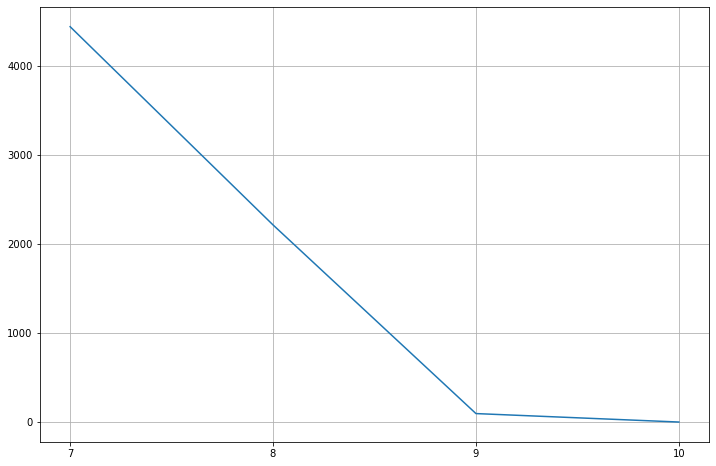

In [91]:
keys = [month for month, df in df.groupby(['Month'])]

plt.plot(keys, month_data)
plt.xticks(keys)
plt.grid()
plt.show()

#### Dataset covered 2 months 

#### >> Tickets were sold slow down from July - the month with highest tickets sold in the dataset
#### >> Assumption: maybe customers used more in the summers and slow down when the summer ends

In [80]:
df.groupby("day_pre_book").count()["quantity"]

day_pre_book
0 days     1766
1 days     2399
2 days      829
3 days      493
4 days      323
5 days      227
6 days      191
7 days      113
8 days       99
9 days       55
10 days      49
11 days      43
12 days      23
13 days      18
14 days      25
15 days      16
16 days      12
17 days      11
18 days      14
19 days       7
20 days       4
21 days       6
22 days       1
23 days       1
24 days       6
25 days       3
26 days       2
27 days       1
28 days       1
29 days       2
30 days       1
31 days       1
32 days       2
34 days       1
35 days       3
37 days       1
38 days       1
47 days       1
50 days       1
63 days       1
85 days       1
Name: quantity, dtype: int64

#### >> Calculate the prebook of customers. They frequently booked before 1 days 
#### >> We should create campaign to increase the prebook days >> it could generate more sales and gain more users  

Text(0.5, 1.0, 'Correlation Matrix for Numeric Features')

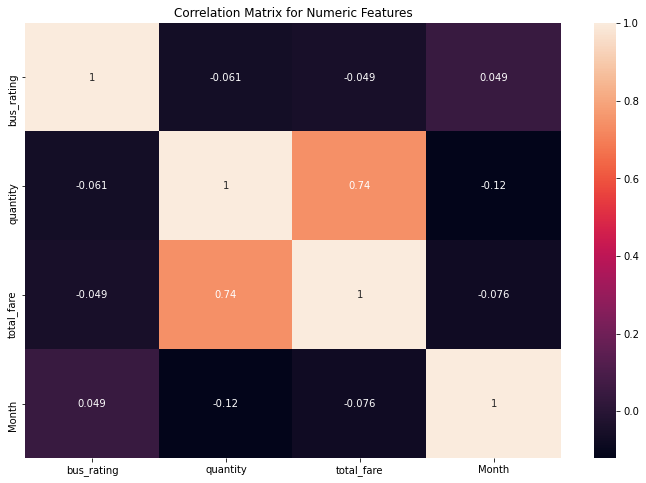

In [90]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix for Numeric Features")


#### >> There is not much correlation in this dataset, only between quantity and total_fare have high correlation

Text(0, 0.5, 'Fare')

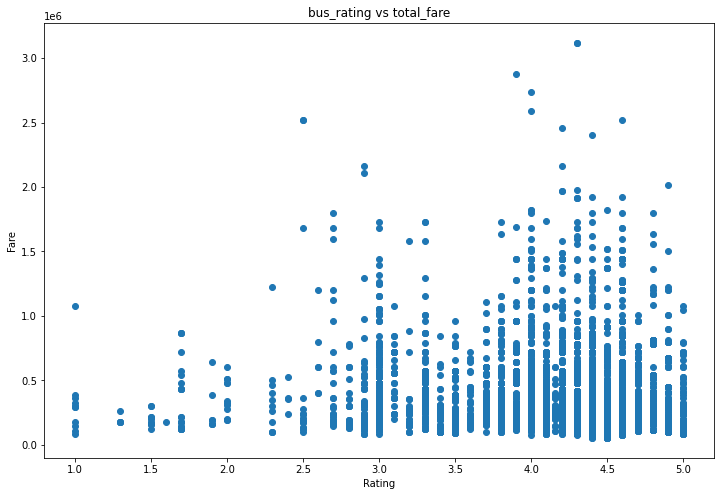

In [94]:
## Scatter plot with bus_rating and total_fare

plt.scatter(x=df['bus_rating'],y=df['total_fare'])
plt.title("bus_rating vs total_fare")
plt.xlabel("Rating")
plt.ylabel("Fare")

<AxesSubplot:xlabel='bus_rating', ylabel='total_fare'>

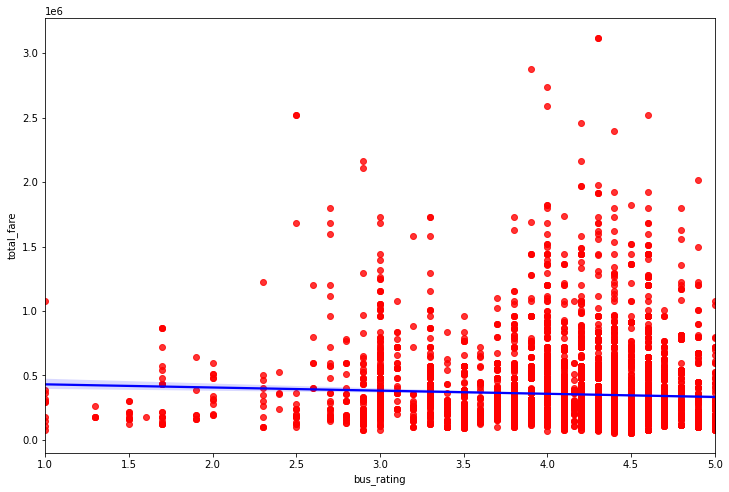

In [95]:
sns.regplot(x="bus_rating",y="total_fare",data=df, scatter_kws = {"color":"red"},line_kws={"color":"blue"})

#### Export to new excel file

In [10]:
df.to_excel("VexereAnalysisFile.xlsx")